In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import re
        
# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/test.csv
/kaggle/input/train.csv
/kaggle/input/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# combine dataset
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 12), (418, 11))

# 1. EDA

In [6]:
sns.set()

In [7]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(0, len(x),1) / len(x)
    return x, y

## 1.0. Name:
- Extract title from name

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
for dataset in combine:
    dataset['Title'] = dataset.Name.map(lambda x: re.findall(r'[A-Za-z]+[.]', x)[0][:-1])
    
titles = train_df.Name.map(lambda x: re.findall(r'[A-Za-z]+[.]', x)[0][:-1]).unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [10]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [11]:
# map title to integer
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## 1.1. Pclass:
- Pclass does not have null entries

In [12]:
pclass = train_df['Pclass']

In [13]:
pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

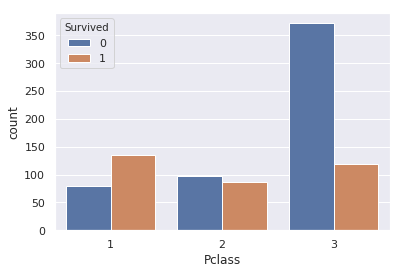

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


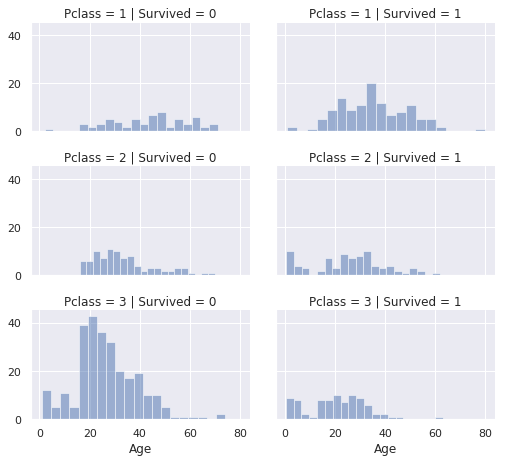

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## 1.2. Sex:

In [16]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

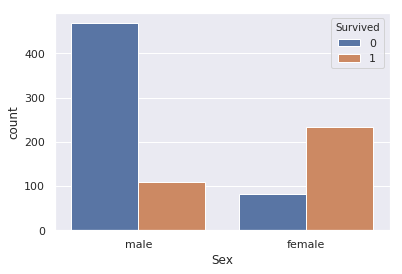

In [17]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

In [18]:
# map sex to integer
for dataset in combine:
    dataset['Sex'] = dataset.Sex.map({'male':0, 'female':1})

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


## 1.3. Age

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


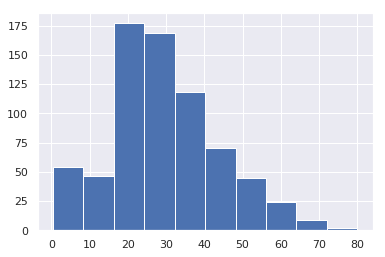

In [19]:
plt.hist(train_df['Age'])
plt.show()

In [20]:
print("Number of null values in age col: ", sum(train_df['Age'].isnull()))

Number of null values in age col:  177


In [21]:
print((train_df['Age'] == 1).sum())
train_df[train_df['Age'] > 70]

7


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C,1
116,117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q,1
493,494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C,1
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S,1
851,852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S,1


In [22]:
age_cate = pd.cut(train_df['Age'], bins=10, labels=False)

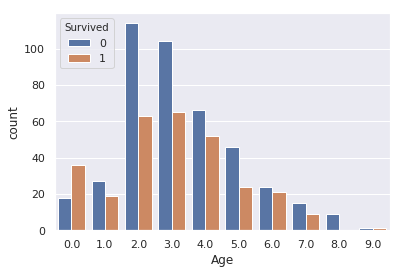

In [23]:
sns.countplot(x=age_cate, hue=train_df['Survived'])

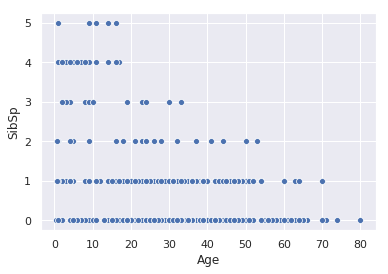

In [24]:
sns.scatterplot('Age', 'SibSp', data=train_df)

In [25]:
train_df[['Age', 'SibSp']].corr()

,Age,SibSp
Age,1.000000,-0.308247
SibSp,-0.308247,1.000000


In [26]:
train_df[['Age', 'Pclass']].corr()

,Age,Pclass
Age,1.000000,-0.369226
Pclass,-0.369226,1.000000


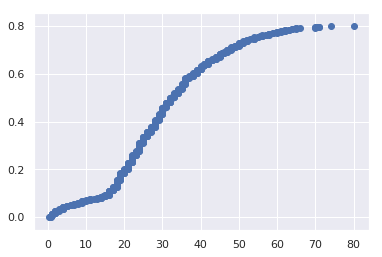

In [27]:
plt.scatter(*ecdf(train_df['Age']))

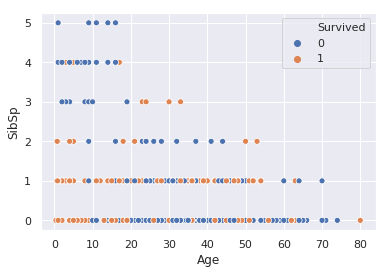

In [28]:
sns.scatterplot(x='Age', y='SibSp', hue='Survived' ,data=train_df)

In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
# impute age column:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = train_df[(train_df['Sex'] == i) & \
                                  (train_df['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,1


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


## 1.5. SibSp

In [32]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

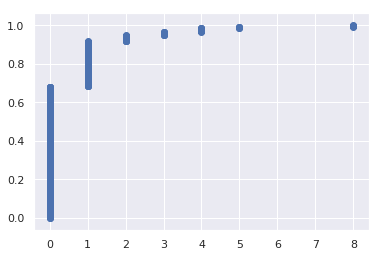

In [33]:
plt.scatter(*ecdf(train_df['SibSp']))

In [34]:
(train_df['SibSp'] > 6).sum()
# train_df = train_df[train_df['SibSp'] < 6]

7

## 1.4. Parch

In [35]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

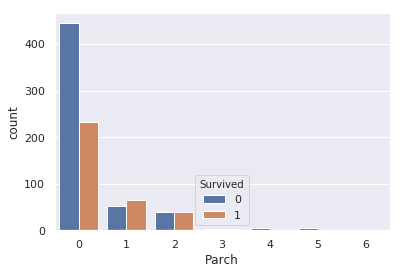

In [36]:
sns.countplot(x='Parch',data=train_df, hue=train_df['Survived'])

## 1.5. Ticket

In [37]:
ticket_set = train_df['Ticket'].unique()
print('Number of distinct ticket:', len(ticket_set))

Number of distinct ticket: 681


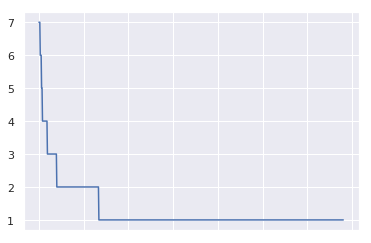

In [38]:
train_df['Ticket'].value_counts().plot()

## 1.6. Fare

In [39]:
train_df['Fare'].dtype

dtype('float64')

In [40]:
train_df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

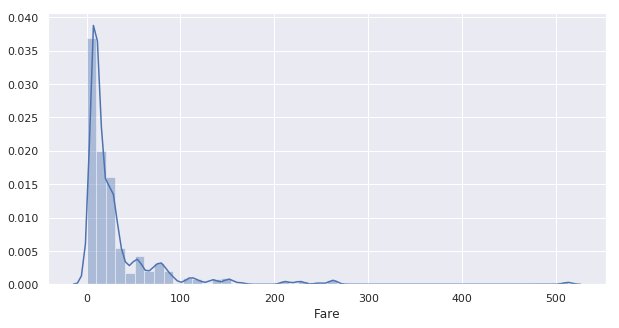

In [41]:
plt.figure(figsize=(10, 5))
sns.distplot(train_df['Fare'])

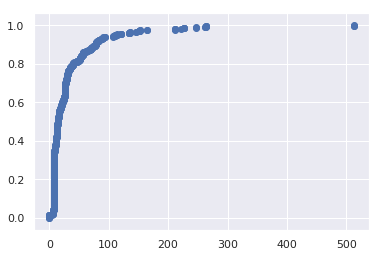

In [42]:
plt.scatter(*ecdf(train_df['Fare']))

In [43]:
(train_df['Fare'] > 500).sum()

# train_df = train_df[train_df['Fare'] < 500]

3

In [44]:
# plt.scatter(*ecdf(train_df[train_df['Fare'] < 500]['Fare']))

In [45]:
# train_df[train_df['Fare'] > 200]

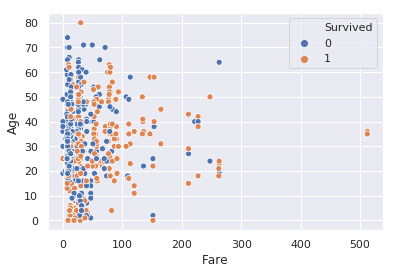

In [46]:
sns.scatterplot(train_df['Fare'], train_df['Age'], hue=train_df['Survived'])

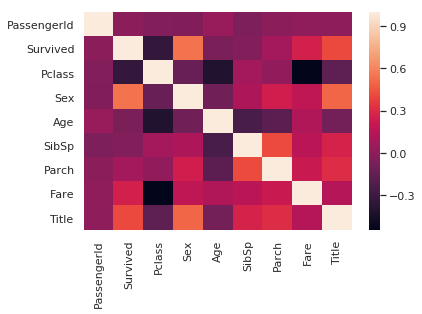

In [47]:
sns.heatmap(train_df.corr())

Test fare mean:  35.6271884892086
Test fare median:  14.4542


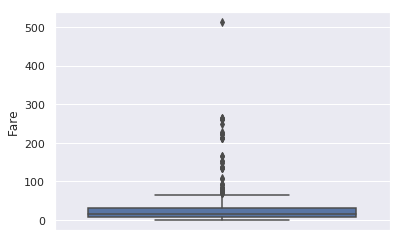

In [48]:
sns.boxplot( y='Fare', data=test_df)
print('Test fare mean: ', test_df.Fare.mean())
print('Test fare median: ', test_df.Fare.median())

In [49]:
# impute fare column of test df with median value
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

In [50]:
test_df.Fare.isnull().sum()

0

## 1.7. Cabin

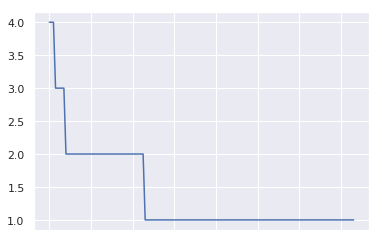

In [51]:
train_df['Cabin'].value_counts().plot()

In [52]:
train_df['Cabin'].isnull().sum()

687

In [53]:
train_df['Cabin'].value_counts().head()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
Name: Cabin, dtype: int64

In [54]:
train_df.Cabin.dtype

dtype('O')

In [55]:
train_df['Cabin'] = train_df.Cabin.map(lambda x: str(x)[0] if x is not np.nan else 'Missing')

In [56]:
train_df['Cabin'].value_counts()

Missing    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin, dtype: int64

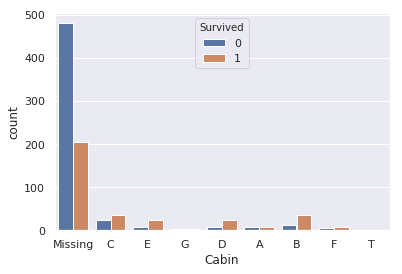

In [57]:
sns.countplot(x='Cabin', hue='Survived', data=train_df)

## 1.8. Embarked

In [58]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

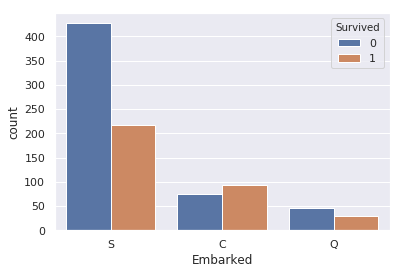

In [59]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

In [60]:
train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace=True)

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [62]:
for dataset in combine:
    dataset['Embarked'] = dataset.Embarked.map({'S':0, 'C':1, 'Q':2}).astype(int)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,Missing,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,Missing,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,Missing,0,1


## 1.9. Survived

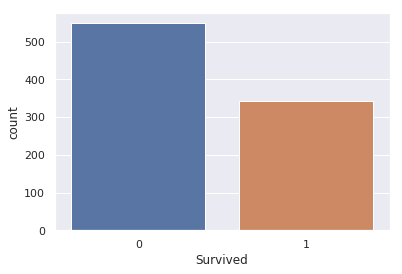

In [63]:
sns.countplot(train_df['Survived'])

## 1.10. Feature generation:
- We convert age to age band (Ordinal)
- We convert fare to fare band (Ordinal)
- isAlone: True if SibSp + Parch == 0
- Age*Pclass: product of age and pclass

In [64]:
# age band
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,Missing,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,Missing,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,Missing,0,1


In [65]:
test_df.Fare.isnull().sum()

0

In [66]:
# fare band
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,Missing,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,Missing,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,Missing,0,1
5,6,0,3,"Moran, Mr. James",0,1,0,0,330877,1,Missing,2,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,0,0,17463,3,E,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,Missing,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,0,2,347742,1,Missing,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,2,Missing,1,3


In [67]:
def isAlone(row):
    sibsp = row[0]
    parch = row[1]
    if(sibsp + parch == 0):
        return 1
    
    return 0

for dataset in combine:
    dataset['IsAlone'] = dataset[['SibSp', 'Parch']].apply(isAlone, axis=1)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,Missing,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C,1,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,Missing,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C,0,3,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,Missing,0,1,1


In [68]:
# age*pclass
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age']*dataset['Pclass']
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Pclass
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,Missing,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,Missing,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,Missing,0,1,1,6


# 2. Training

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler

## 2.1. Data preprocessing:
- Drop unecessary columns: PassengerId, Name, SibSp, Parch, Cabin, Ticket

In [70]:
for dataset in combine:
    dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'], axis=1, inplace=True)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


## 2.2. Train test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
FEATURE_COLS = list(train_df.columns)
FEATURE_COLS.remove('Survived')
print(FEATURE_COLS)

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone', 'Age*Pclass']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(train_df[FEATURE_COLS], train_df['Survived'], test_size=0.2)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import f1_score

In [75]:
SCORING_METHOD = 'accuracy'

def train_and_evaluate_estimator(grid_estimator):
    grid_estimator.fit(X_train, y_train)
    
    return grid_estimator, grid_estimator.best_params_, grid_estimator.best_score_, grid_estimator.score(X_train, y_train), grid_estimator.score(X_test, y_test)

## Random forest

In [76]:
grid_rf = GridSearchCV(param_grid={'n_estimators':[10, 50, 100, 200], 
                                'max_depth':[5, 15, 20, 25, 30],
                               'max_features':['log2', 'auto', 'sqrt']}, 
                    scoring=SCORING_METHOD, estimator=RandomForestClassifier())

## Decision tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                       param_grid={'max_depth':[2, 3, 4, 5, 8],
                                  'min_samples_split':[2, 4, 6, 8, 10],
                                  'min_samples_leaf':[5, 8, 10, 12, 15, 20]}, 
                       cv=5,
                      scoring=SCORING_METHOD)

## KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = SCORING_METHOD)

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
grid_lr = GridSearchCV(estimator=LogisticRegression(),
                      param_grid={
                          'penalty':['l1', 'l2'],
                          'C':[10**k for k in range(-4, 4)]
                      },
                      cv=5,
                      n_jobs=3,
                      scoring=SCORING_METHOD)

In [83]:
grid_lr.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [84]:
grid_lr.score(X_test, y_test)

0.8156424581005587

## Let's train

In [85]:
report = dict() # 5 cols: estimator, best param, cross val score, training score, testing score 
report['estimator'] = []
report['best_params'] = []
report['cross val '+SCORING_METHOD] = []
report['training '+ SCORING_METHOD] = []
report['testing ' + SCORING_METHOD] = []

list_estimator = [
    ('logistic regression', grid_lr),
#     ('knn', grid_knn),
    ('decision tree', grid_dt),
#     ('random forest', grid_rf)
]

trained_estimators = dict()

for name, estimator in list_estimator:
    trained_estmt, best_param, crs_val_score, train_score, test_score = train_and_evaluate_estimator(estimator)
    trained_estimators[name] = trained_estmt
    report['estimator'].append(name)
    report['best_params'].append(best_param)
    report['cross val '+SCORING_METHOD].append(crs_val_score)
    report['training '+ SCORING_METHOD].append(train_score)
    report['testing ' + SCORING_METHOD].append(test_score)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
report_df = pd.DataFrame(report)
index_best_model = np.argmax(0.5*(report_df['cross val '+SCORING_METHOD] + report_df['testing '+SCORING_METHOD]))
best_model_name = report_df.iloc[index_best_model, 0]
best_model = trained_estimators[best_model_name].best_estimator_
print(report_df.head())
print("Best model ..")
print(report_df.iloc[index_best_model])

             estimator                                        best_params  \
0  logistic regression                        {'C': 0.1, 'penalty': 'l1'}   
1        decision tree  {'max_depth': 3, 'min_samples_leaf': 5, 'min_s...   

   cross val accuracy  training accuracy  testing accuracy  
0            0.785112           0.780899          0.815642  
1            0.804775           0.816011          0.832402  
Best model ..
estimator                                                 decision tree
best_params           {'max_depth': 3, 'min_samples_leaf': 5, 'min_s...
cross val accuracy                                             0.804775
training accuracy                                              0.816011
testing accuracy                                               0.832402
Name: 1, dtype: object


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


# 3. Predictions:

In [87]:
best_model.fit(train_df[FEATURE_COLS], train_df['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
y_pred = best_model.predict(test_df)

In [89]:
submission = pd.read_csv('../input/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [90]:
submission['Survived'] = y_pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [91]:
submission.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 